<a href="https://colab.research.google.com/github/SamuelLawrence876/Jamaica-Stock-Exchange---LTSM-deep-learning/blob/master/Time_series_LTSM_Jamaica_Stock_Exchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'd like to acklowledge Jason Brownlee for his explanation and cotribution towards this LSTM model:
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

# This notebook seeks to understand How to develop LSTM models for univariate time series forecasting.

Difference between Univariate time series and Multivariate time series:


**Univariate time series:** Only one variable is varying over time. For example, data collected from a sensor measuring the temperature of a room every second. Therefore, each second, you will only have a one-dimensional value, which is the temperature.


**Multivariate time series:** Multiple variables are varying over time. For example, a tri-axial accelerometer. There are three accelerations, one for each axis (x,y,z) and they vary simultaneously over time.



As such, we will be using Univariate time series analysis for our prediction. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

Different models to run: 
 ## Univariate LSTM Models - single variable
- vanilla LSTM
- Bidirectional LSTM
- CNN LSTM
- ConvLSTM



In [2]:
url = 'https://www.jamstockex.com/market-data/download-data/index-history/main-market/JSE-Index/2010-08-08/2020-08-10'
df = pd.read_html(url)

In [3]:
jse = df[0] 

In [4]:
jse.head()

,Date,Index,Value,Change,Change (%),Volume Traded
0,Aug-09-2010,JSE Index,86537.90,-293.10,-0.34%,1371526
1,Aug-10-2010,JSE Index,86252.56,-285.34,-0.33%,815629
2,Aug-11-2010,JSE Index,85848.64,-403.92,-0.47%,1128050
3,Aug-12-2010,JSE Index,86384.57,535.93,0.62%,3296562
4,Aug-13-2010,JSE Index,86019.03,-365.54,-0.42%,1632501


In [5]:
jse.shape

(2515, 6)

Average Change

In [6]:
jse['Change'].mean()

111.35289463220656

The amount of years of data we have

In [7]:
 jse.shape[0] / 365

6.890410958904109

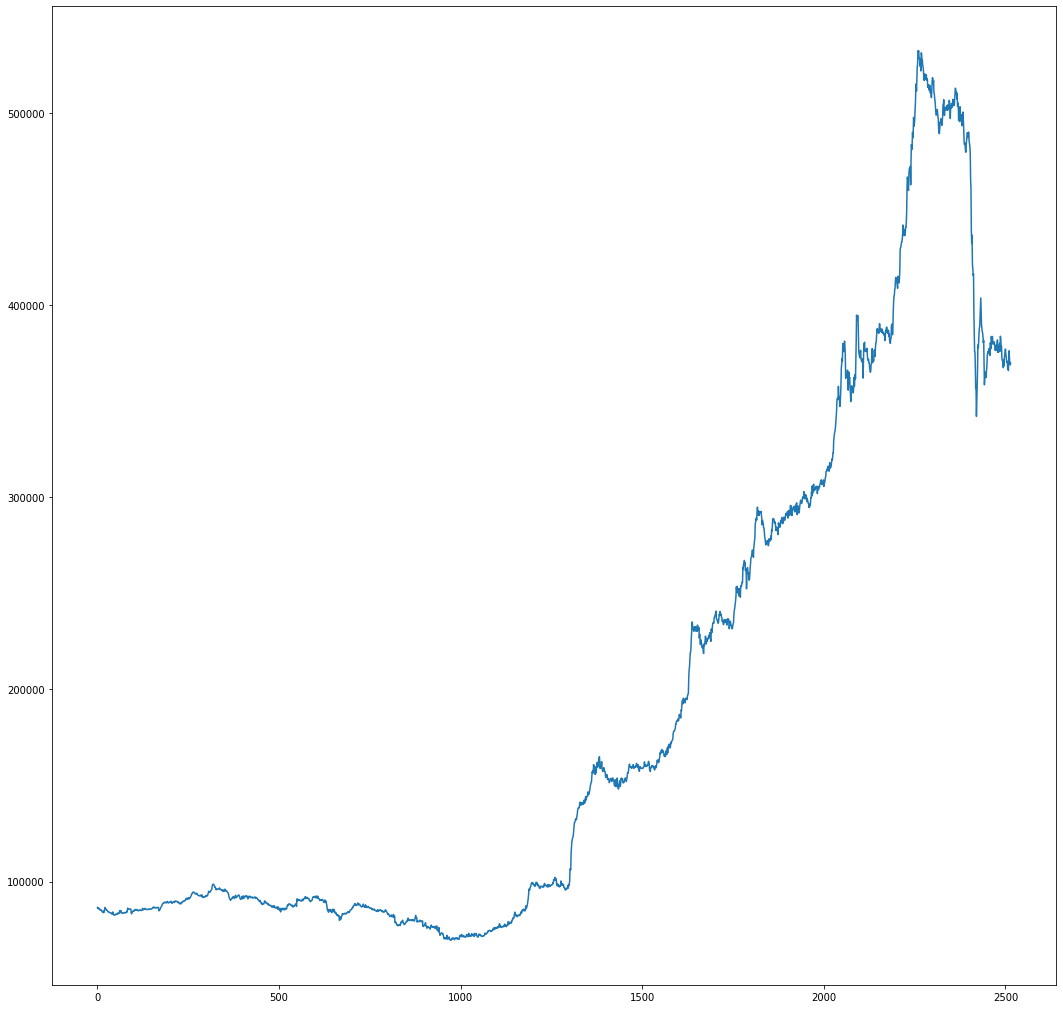

In [8]:
plt.figure(figsize=(18,18))
plt.plot(jse['Value'])

In [9]:
jse_value = jse['Value']

In [10]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler(feature_range=(0,1))
#jse_value=scaler.fit_transform(np.array(jse_value).reshape(-1,1))

In [11]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [12]:
# define input sequence for all models
raw_seq = jse_value

# Vanilla LSTM

In [13]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [14]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [15]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [16]:
# demonstrate prediction
x_input = array(jse_value.tail(3).tolist())
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [17]:
print(yhat[0][0])

369038.6


In [18]:
jse_value.iloc[-1]

369854.08

In [19]:
difference = yhat[0][0] - jse_value.iloc[-1]

In [20]:
difference

-815.4862500000163

# Bidirectional LSTM

In [21]:
# univariate lstm example
from keras.layers import Bidirectional


In [22]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


In [23]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [24]:
raw_seq = jse_value
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [25]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [26]:
# demonstrate prediction
x_input = array(jse_value.tail(3).tolist())
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [27]:
print(yhat)

[[367951.78]]


In [28]:
jse_value.tail(1)

2514    369854.08
Name: Value, dtype: float64

In [29]:
difference = yhat[0] - jse_value.tail(1)

In [30]:
difference

2514   -1902.29875
Name: Value, dtype: float64

# CNN LSTM

In [31]:
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [32]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

In [33]:
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))


In [34]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)


In [35]:
# demonstrate prediction
x_input = array(jse_value.tail(4).tolist())
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [36]:
print(yhat)

[[370873.44]]


In [37]:
jse_value.tail(1)

2514    369854.08
Name: Value, dtype: float64

In [38]:
difference = yhat[0] - jse_value.tail(1)

In [39]:
difference

2514    1019.3575
Name: Value, dtype: float64

# ConvLSTM

In [40]:
from keras.layers import ConvLSTM2D

In [41]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [42]:
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [43]:
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)

In [44]:
x_input = array(jse_value.tail(4).tolist())
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [45]:
print(yhat)

[[367558.1]]


In [46]:
jse_value.tail(1)

2514    369854.08
Name: Value, dtype: float64

In [47]:
difference = yhat[0] - jse_value.tail(1)

In [48]:
difference

2514   -2295.98625
Name: Value, dtype: float64